In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and Visualization

In [4]:
data = data.rename({'R&D Spend': 'RnD', 'Administration': 'Admin', 'Marketing Spend': 'Marketing'}, axis=1)
data.head()

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,RnD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data[data.duplicated()].shape

(0, 5)

In [8]:
data.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


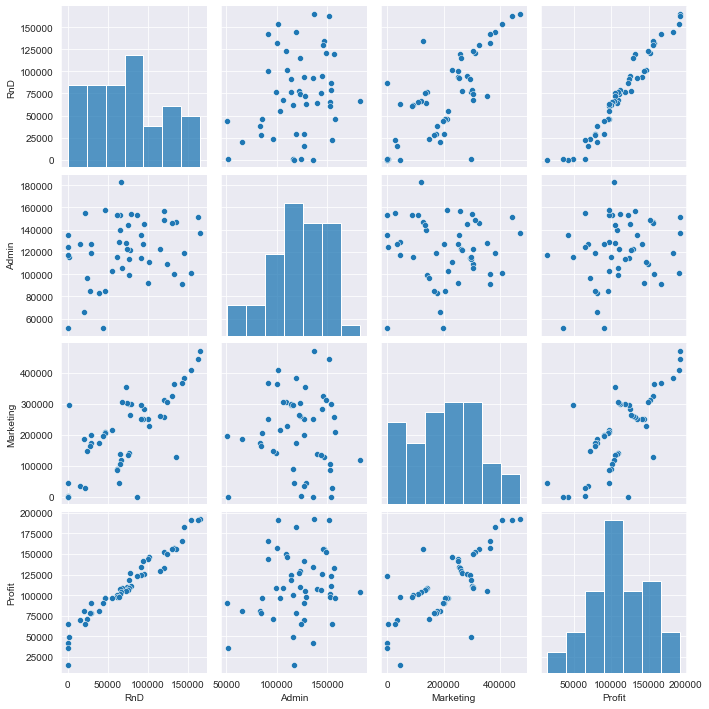

In [9]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

# Model Building

In [10]:
model = smf.ols('Profit~RnD+Admin+Marketing', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        19:36:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Testing

In [11]:
model.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [12]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept     7.626218
 RnD          17.846374
 Admin        -0.525507
 Marketing     1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RnD          2.634968e-22
 Admin        6.017551e-01
 Marketing    1.047168e-01
 dtype: float64)

In [13]:
#rsquared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [14]:
#build model with Admin using SLR
admin_model = smf.ols('Profit~Admin', data = data).fit()

In [15]:
admin_model.tvalues, admin_model.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [16]:
#build model with Marketing using SLR
marketing_model = smf.ols('Profit~Marketing', data = data).fit()

In [17]:
marketing_model.tvalues, marketing_model.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [18]:
#build model with Admin and Marketing using MLR
mlr_model = smf.ols('Profit~Admin+Marketing', data = data).fit()

In [19]:
mlr_model.tvalues, mlr_model.pvalues

(Intercept    1.142741
 Admin        2.467779
 Marketing    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Marketing    9.727245e-11
 dtype: float64)

# Model Validation

## 1. Collinearity Check

In [20]:
# Calculate VIF = 1/(1-Rsquare) for all indepndent variables

rsq_r=smf.ols("RnD~Admin+Marketing",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~RnD+Marketing",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing~RnD+Admin",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD','Admin','Marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD,2.468903
1,Admin,1.175091
2,Marketing,2.326773


No Collinearity, so consider all variables in regression equation

## 2. Residual Analysis

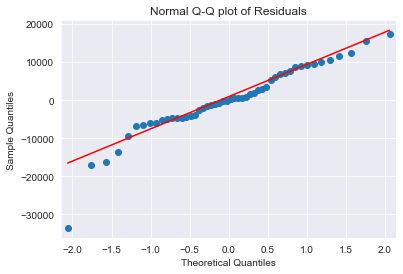

In [21]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [22]:
list(np.where(model.resid < -30000))

[array([49], dtype=int64)]

### Test for Homoscedasticity or Heteroscedasticity

In [23]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

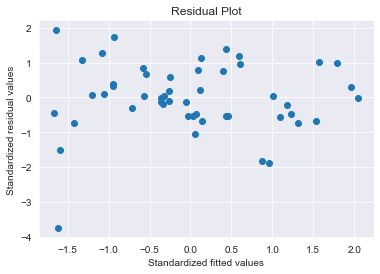

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Test for errors or Residuals vs Regressors or independent 'x' variables or predictors

eval_env: 1


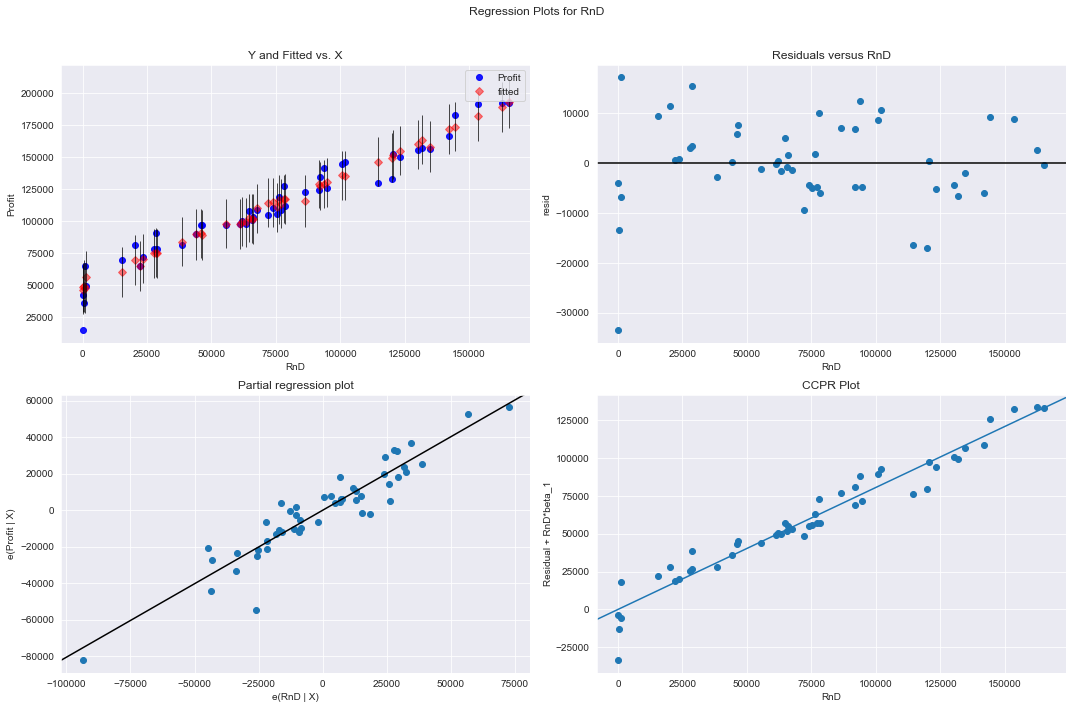

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

eval_env: 1


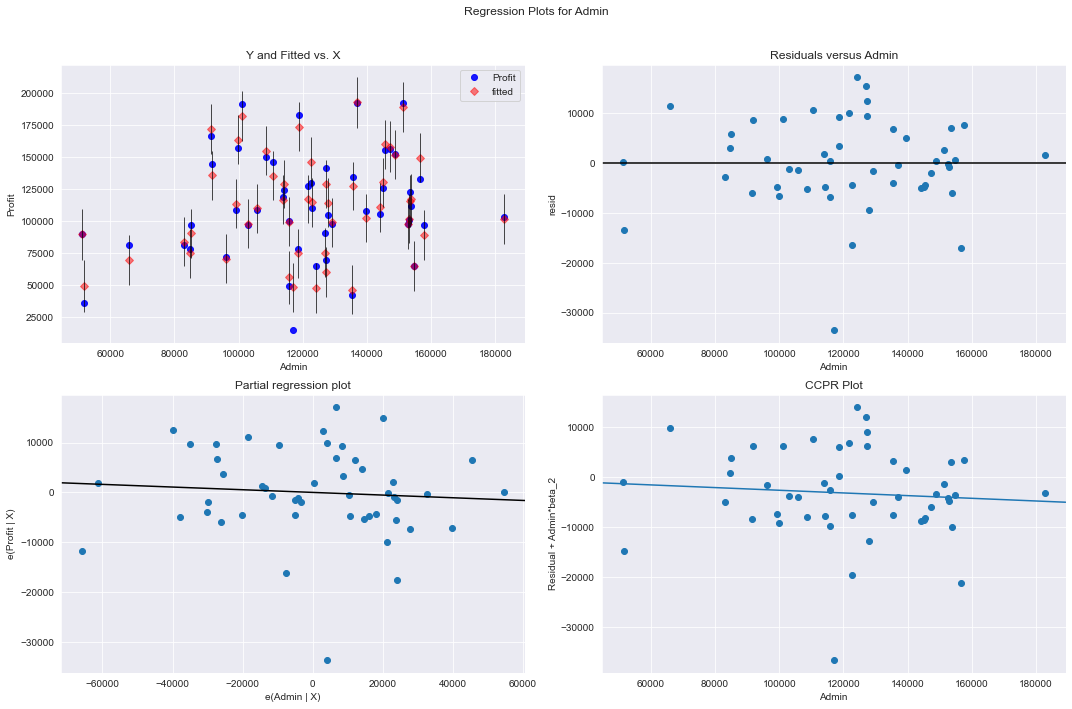

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

eval_env: 1


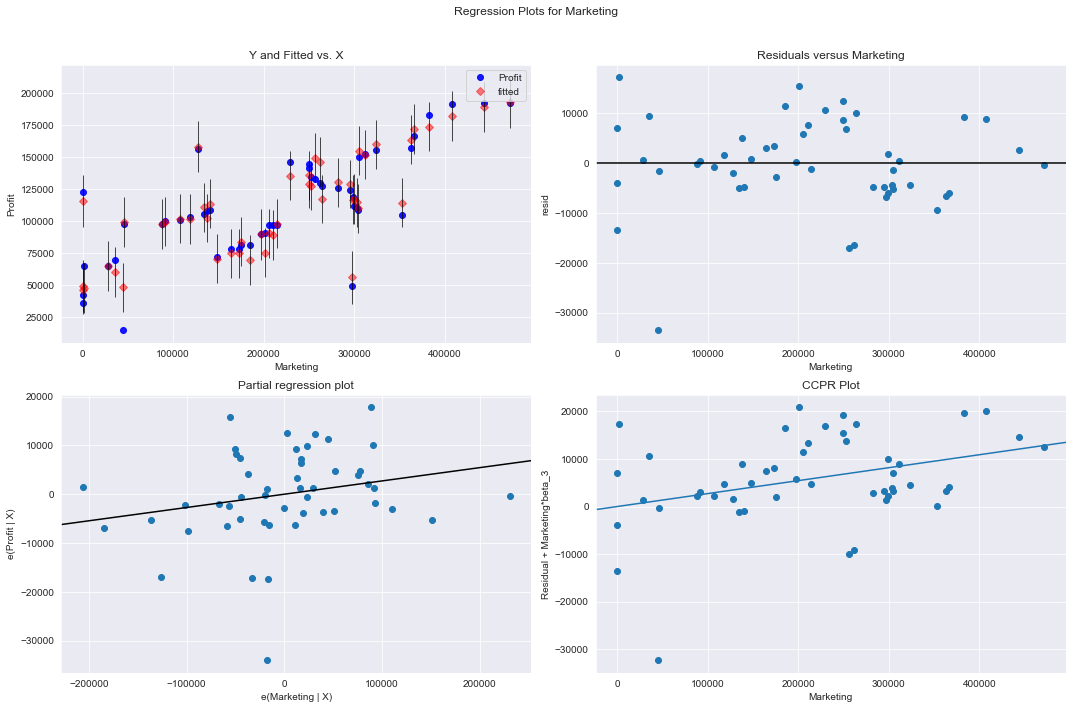

In [27]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

# Model Deletion Diagnosis
### Checking Outliers or Influencers

## 1. Cook's Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

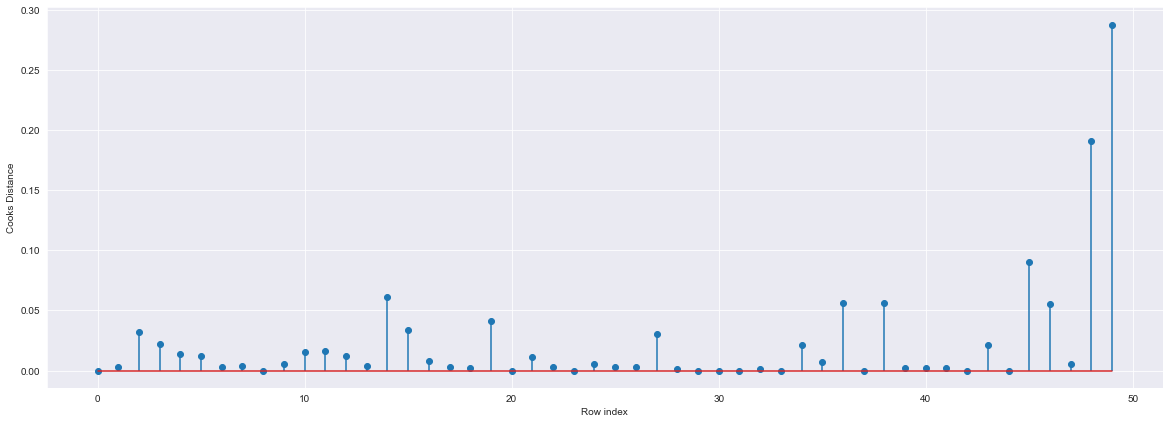

In [29]:
#plot the influencers using stem plot

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#Index and value of influencer where C > 0.5
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

## 2. Leverage Value

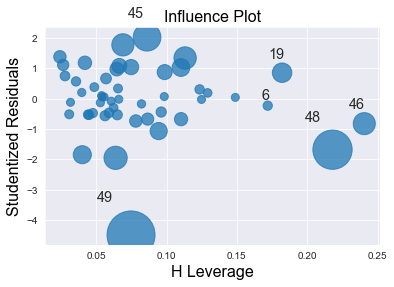

In [31]:
#Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [32]:
# Leverage Cuttoff Value = 3*(k+1)/n 
#k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [33]:
data[data.index.isin([49])]

,RnD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [34]:
# Discard the data points which are influencers and reassign the row number
data = data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data

,RnD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [35]:
model1 = smf.ols('Profit~RnD+Admin+Marketing', data = data).fit()

In [36]:
while model1.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model1 = smf.ols('Profit~RnD+Admin+Marketing',data = data).fit()
        (c,_) = model1.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data = data.drop(data.index[[np.argmax(c)]],axis = 0).reset_index(drop = True)
        data
    else:
        final_model = smf.ols('Profit~RnD+Admin+Marketing',data = data).fit()
        final_model.rsquared , final_model.aic
        print("The model accuracy is improved to",final_model.rsquared)

The model accuracy is improved to 0.9626766170294073
The model accuracy is improved to 0.9614129113440602
The model accuracy is improved to 0.962593650298269
The model accuracy is improved to 0.9638487279209415
The model accuracy is improved to 0.9663901957918793
The model accuracy is improved to 0.9706076169779905
The model accuracy is improved to 0.9727840588916423
The model accuracy is improved to 0.9734292907181952
The model accuracy is improved to 0.9785801571833451
The model accuracy is improved to 0.9777383743090916
The model accuracy is improved to 0.9790510088977512
The model accuracy is improved to 0.9790004461890552
The model accuracy is improved to 0.9807878666153609
The model accuracy is improved to 0.9838299343609735
The model accuracy is improved to 0.9831149926392769
The model accuracy is improved to 0.9833768520972176
The model accuracy is improved to 0.9878892536376698
The model accuracy is improved to 0.9877191935547199
The model accuracy is improved to 0.98583566274

In [37]:
final_model.rsquared

0.9882757054424702

In [38]:
data

,RnD,Admin,Marketing,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


# Model Predictions

In [39]:
# if new data predictions is 
New_Data = pd.DataFrame({'RnD': 75000, 'Admin': 85000, 'Marketing': 135000}, index = [0])
New_Data

,RnD,Admin,Marketing
0,75000,85000,135000


In [40]:
#Manual Prediction
final_model.predict(New_Data)

0    107962.852112
dtype: float64

In [41]:
#Automatic Prediction of Profit
pred_Y = final_model.predict(data)
pred_Y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# R^2 value for each prepared model

In [42]:
data1 = {'Prepared_Models':['Model', 'Final_model'], 'R-squared':[model.rsquared, final_model.rsquared]}
df = pd.DataFrame(data1)
df

,Prepared_Models,R-squared
0,Model,0.950746
1,Final_model,0.988276
